In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import time
def generate_matrix(df,color):
    data = []
    for i, row in df.iterrows():
        sublist = []
        row = row.to_dict()
        row = { k:v for k,v in row.items() if v >0}
        for item, value in row.items():
            sublist = []
            sublist.append(item)
            sublist.append(i)
            sublist.append(color)

            data.append(sublist)


    op = pd.DataFrame(data, columns=['gene','time','color'])
    return op
    
df1 = pd.read_excel(r"merged_hbond_data_control.xlsx" , index_col='Time (ns)',sheet_name=0)
df2 = pd.read_excel(r"merged_hbond_data_test.xlsx" , index_col='Time (ns)',sheet_name=0)

df1 = generate_matrix(df1,'black')
df2 = generate_matrix(df2,'red')

main_df = pd.concat([df1,df2])
# print(main_df)

# # ,df1,df2

main_df = main_df.groupby(['gene','color']).agg(pd.Series.tolist)
# print(main_df)

main_df.reset_index(inplace=True)

offsets = list(main_df.index)
plt.rc('font',family='Times New Roman')
plt.rcParams.update({'font.size': 30})

main_df['gene_numerical'] = pd.factorize(main_df['gene'])[0]
main_df['gene_numerical'] = main_df['gene_numerical'].astype(float)


# new_values_new_factor = {3:2.75, 4: 3.25, 5:3.75, 6: 4.25, 14:11.75, 15:12.5, 19:15.25, 20:16.25, 22:17.75, 23:18.25}
new_values_new_factor = {4: 3.3, 6: 4.3, 15:12.3, 20:16.3, 23:18.3}

# Replace the values using .loc
for pos, value in new_values_new_factor.items():
    main_df.iloc[pos, main_df.columns.get_loc('gene_numerical')] = value
print(main_df['gene_numerical'])

0      0.0
1      1.0
2      2.0
3      3.0
4      3.3
5      4.0
6      4.3
7      5.0
8      6.0
9      7.0
10     8.0
11     9.0
12    10.0
13    11.0
14    12.0
15    12.3
16    13.0
17    14.0
18    15.0
19    16.0
20    16.3
21    17.0
22    18.0
23    18.3
24    19.0
25    20.0
Name: gene_numerical, dtype: float64


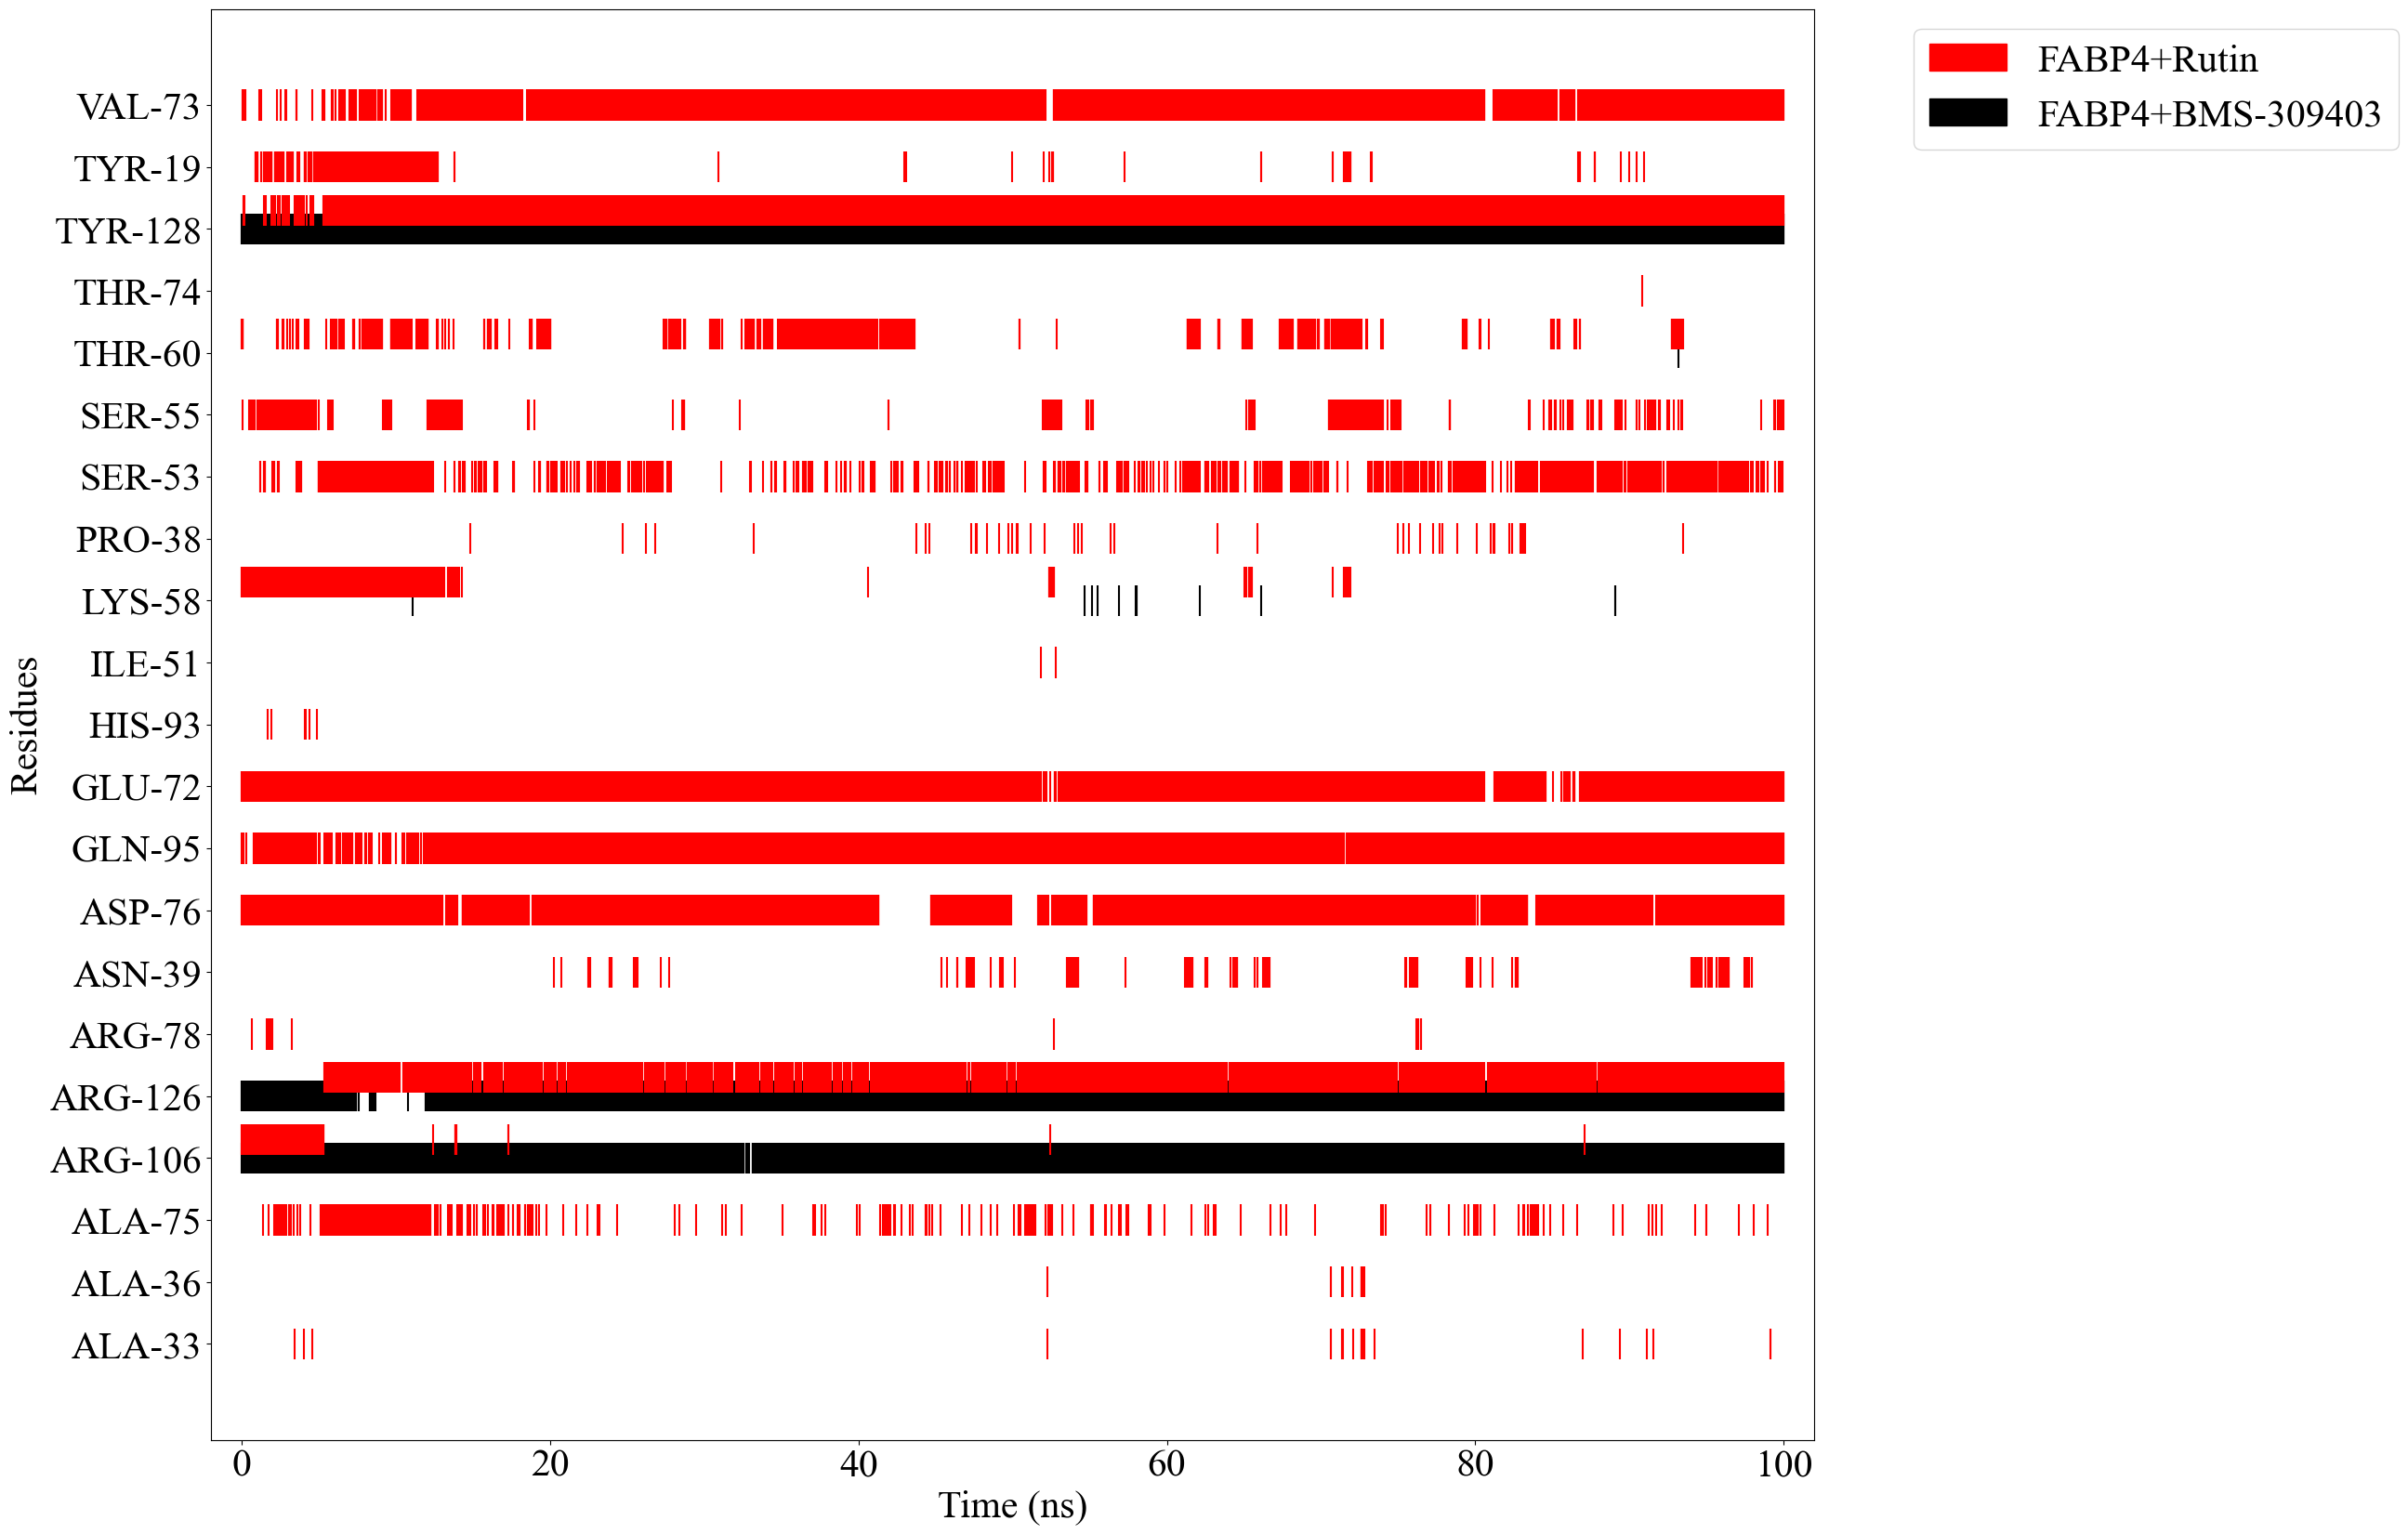

In [38]:
# plt.rc('font',family='helvetica')
plt.rcParams.update({'font.size': 30})
plt.figure(figsize=((30,20)))
plt.eventplot(main_df['time'], linelengths=0.5, colors=main_df['color'], lineoffsets=main_df['gene_numerical'])
# plt.yticks(main_df['gene_numerical'], main_df['gene'])

unique_gene = main_df.drop_duplicates(subset=['gene'])
plt.yticks(unique_gene['gene_numerical'], unique_gene['gene'])

plt.xlabel('Time (ns)')
plt.ylabel('Residues')

legend_patches = [Patch(facecolor='red', label='FABP4+Rutin',edgecolor='red'), Patch(facecolor='black', label='FABP4+BMS-309403',edgecolor='black')]

plt.xlim(-2, 102)

plt.legend(handles=legend_patches,bbox_to_anchor=(1.05,1), loc='upper left')
plt.subplots_adjust(right=0.7)
plt.savefig('C:/Users/Abel John/Desktop/Hbond_test.png', dpi=300) 
plt.show()